# Boosting
- iterative learning a set of weak models on subsets of the data
- weigh each weak prediction according to its performance (validation score)
- combine weighted predictions to obtain a single prediction

# Classification

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

## Load data

In [2]:
dataset=load_breast_cancer()
df = pd.DataFrame(
    data=dataset['data'],
    columns=dataset['feature_names']
)
X = df
y = dataset['target']

## Split data into test and training set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Create classification model

In [4]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, max_depth=4)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
score = accuracy_score(y_pred, y_test) ** 0.5
print('Accuracy score: {:.3f}'.format(score))

Accuracy score: 0.978


## Plot feature importance

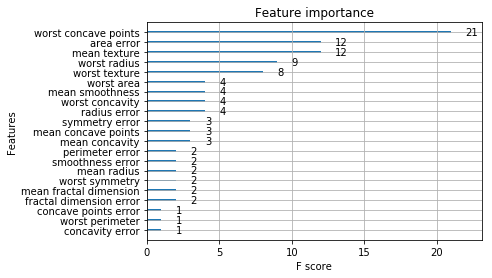

In [5]:
xgb.plot_importance(xgb_clf)
plt.show()